# Exploratory Analysis of DANDI Dandiset 001363

**IMPORTANT DISCLAIMER:**  
This notebook was autogenerated using `dandi-notebook-gen` tools powered by AI. The code has not been fully reviewed or validated. Please double-check the analyses and interpret the scientific results with caution.

---

## Citation
Ramachandran, Sandhya; Gao, Huan; Yu, Kai; Yeh, Kelly; He, Bin (2025) Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound (Version draft) [Data set]. DANDI Archive. https://dandiarchive.org/dandiset/001363/draft

---

## About the dataset
This dataset examines neuronal responses in the rat somatosensory cortex during transcranial focused ultrasound (tFUS) stimulation, recorded via an ultraflexible nanoelectrode array.
Across experimental sessions, various ultrasound parameters were manipulated, including pressure amplitude, duty cycle, and pulse repetition frequency.

Recordings contain ~21 minutes of continuous multi-channel extracellular signals per session, along with timestamped trial intervals associated with ultrasound pulses.

---

## Software Requirements
This notebook requires the following Python packages (install them per your environment, e.g. via pip or conda):
- pynwb
- lindi
- matplotlib
- numpy
- dandi

---

## Listing Dandiset Assets via DANDI API

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())
print(f"Number of assets in Dandiset 001363: {len(assets)}")
for idx, asset in enumerate(assets[:5]):
    print(f"{idx+1}. {asset.path} ({asset.size/1e9:.2f} GB)")

Number of assets in Dandiset 001363: 55
1. sub-BH643/sub-BH643_ecephys.nwb (3.19 GB)
2. sub-BH643/sub-BH643_ses-20241220T182204_ecephys.nwb (3.00 GB)
3. sub-BH643/sub-BH643_ses-20241220T174647_ecephys.nwb (3.15 GB)
4. sub-BH643/sub-BH643_ses-20241220T195303_ecephys.nwb (3.19 GB)
5. sub-BH643/sub-BH643_ses-20241220T180423_ecephys.nwb (3.19 GB)


## Selecting an example NWB file
For this notebook, we focus on the following NWB recording session:

**sub-BH589_ses-20240827T160457_ecephys.nwb**  
URL: `https://lindi.neurosift.org/dandi/dandisets/001363/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/nwb.lindi.json`

---

## Loading the NWB file with `lindi` and `pynwb`

In [2]:
import pynwb
import lindi

url = "https://lindi.neurosift.org/dandi/dandisets/001363/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start: {nwb.session_start_time}")

Session description: Rat Ultrasound Array Stimulation
Identifier: BH589_1500_200_67_25V
Session start: 2024-08-27 16:04:57-04:00


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Subject metadata

In [3]:
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Species: {subject.species}")
print(f"Sex: {subject.sex}")
print(f"Age: {subject.age}")
print(f"Description: {subject.description}")

Subject ID: BH589
Species: Rattus norvegicus
Sex: M
Age: P24W
Description: HSD:WI rat


## Overview of data contents

In [4]:
# List acquisitions and intervals tables
print(f"Acquisition keys: {list(nwb.acquisition.keys())}")
print(f"Intervals keys: {list(nwb.intervals.keys())}")

# Details on continuous signal:
es = nwb.acquisition.get("ElectricalSeries")
print(f"ElectricalSeries shape: {es.data.shape}")
print(f"Sampling rate: {es.rate} Hz")

# Trials info:
trials = nwb.intervals.get("trials")
print(f"Number of trials: {len(trials['id'])}")

Acquisition keys: ['ElectricalSeries']
Intervals keys: ['trials']
ElectricalSeries shape: (31084544, 32)
Sampling rate: 24414.0625 Hz
Number of trials: 500


## Exploring electrode metadata

In [5]:
electrodes = nwb.electrodes
print("Columns:", electrodes.colnames)

for col in electrodes.colnames:
    vals = electrodes[col].data[:]
    print(f"{col}: {vals}")

Columns: ('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')
x: [24.73  0.   24.73  0.   24.73  0.   24.73  0.   24.7   0.   24.73  0.
 24.73  0.   24.73  0.   24.73  0.   24.73  0.   24.73  0.   24.73  0.
 24.73  0.   24.73  0.   24.73  0.   24.73  0.  ]
y: [  0.  25.  50.  75. 100. 125. 150. 175. 200. 225. 250. 275. 300. 325.
 350. 375. 400. 425. 450. 475. 500. 525. 550. 575. 600. 625. 650. 675.
 700. 725. 750. 775.]
z: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
imp: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
location: ['unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown'
 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown'
 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown'
 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown' 'unknown'
 'unknown' 'unknown' 'unkn

## Visualizing a snippet of data around a trial onset

The following figure illustrates a ±100 ms snippet of continuous raw signals around a randomly selected trial onset across all channels.
This brief window aids visualization without loading the full dataset.

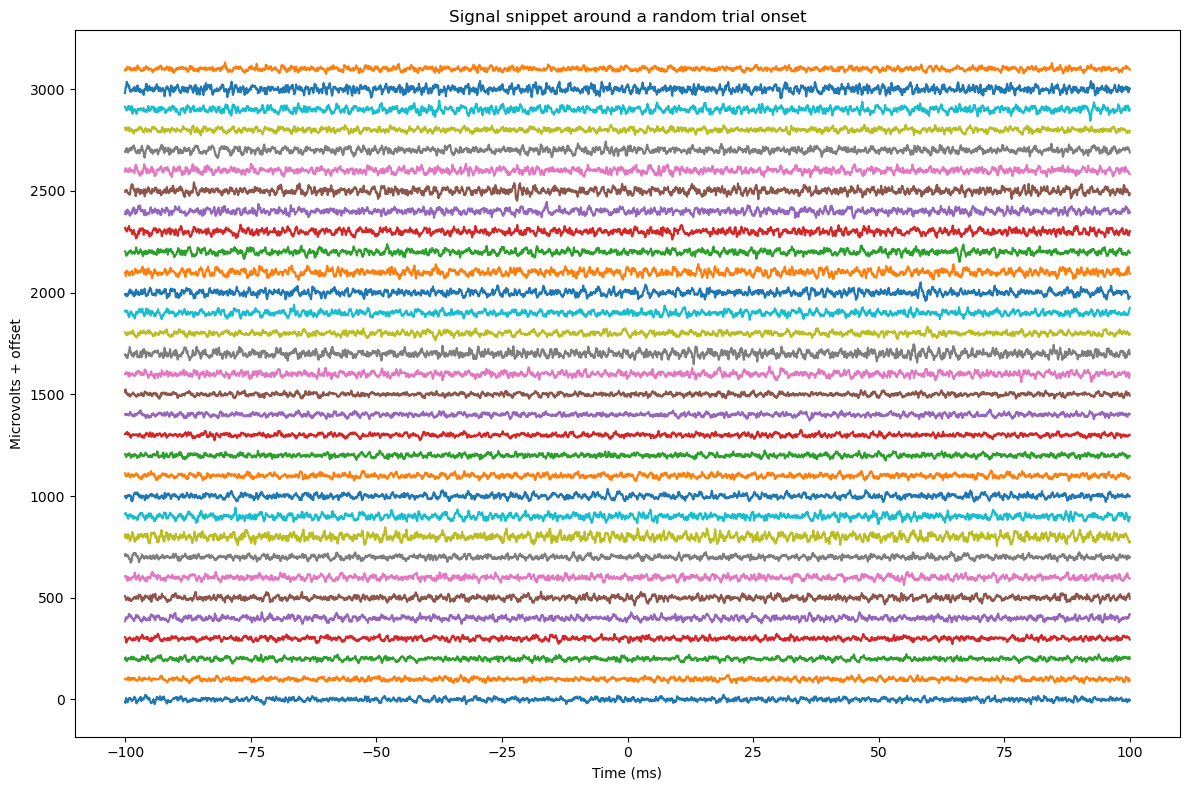

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

rate = es.rate

starts = trials['start_time'][:]
selected_trial = random.choice(starts)

window = 0.1  # seconds before and after
start_idx = int(max((selected_trial - window) * rate, 0))
end_idx = int(min((selected_trial + window) * rate, es.data.shape[0]))

snippet = es.data[start_idx:end_idx, :]
time = np.arange(snippet.shape[0]) / rate + (start_idx / rate - selected_trial)

plt.figure(figsize=(12, 8))
for ch in range(snippet.shape[1]):
    plt.plot(time * 1000, snippet[:, ch] * 1e6 + ch * 100, label=f'Ch {ch}')  # microvolt scale + offset
plt.xlabel('Time (ms)')
plt.ylabel('Microvolts + offset')
plt.title('Signal snippet around a random trial onset')
plt.tight_layout()
plt.show()

This plot shows relatively clean baseline neural signals across all electrodes during a typical trial window. Clear multi-unit spikes are not apparent in this brief window, but data quality appears sufficient for spike sorting or further analyses after appropriate processing.

---

## Suggestions for further analyses

- Event-aligned averaging of neural signals across trials to identify ultrasound-evoked population responses.
- Spike sorting to extract single and multi-unit activity.
- Cross-channel synchronization or correlation analyses.
- Relating neural features to ultrasound parameters (pressure, PRF, duty cycle).
- Statistical analysis to validate observed effects.

These analyses require additional processing pipelines beyond this notebook's scope.

---

**Reminder:**  
This notebook was automatically generated and should be validated and supplemented for your specific research needs.